In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Para renderear el texto de los gráficos de matplotlib con LaTeX, descomentar plt.rcdefaults() para desctivarlo
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# plt.rcdefaults()

df = pd.read_csv("output.csv")
df.head()
df.shape


(5008, 7)

In [33]:
# Ajusto los #SEQ

df['#SEQ'] = range(df.shape[0])

In [34]:
# Saco outliers
df = df[df['total_time'] <= 10]
df['total_time'].sort_values(ascending=False)

4687    5.070610
2216    5.015957
3617    5.015292
3593    5.014922
3690    5.014838
          ...   
1356    0.000000
3089    0.000000
3087    0.000000
1363    0.000000
2503    0.000000
Name: total_time, Length: 5006, dtype: float64

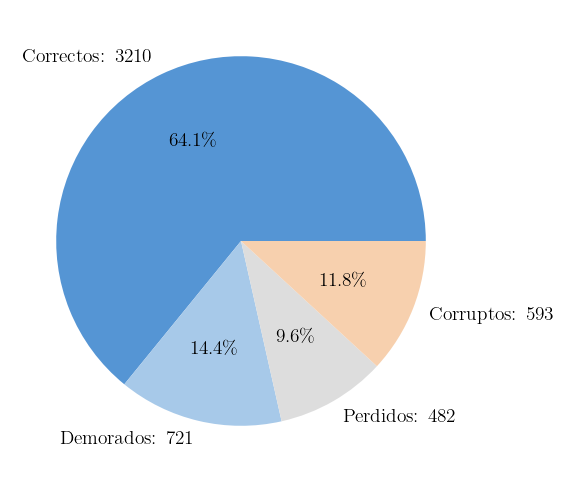

In [49]:
plt.figure(figsize=(10, 6))
cant_enviados = df.shape[0]
cant_recibidos = (df['time_received'] != 0).sum()
cant_corruptos = (df['corrupto'] == 1).sum()
cant_demorados = (df['demorado'] == 1).sum()
cant_perdidos = (df['time_received'] == 0).sum()
cant_normal = cant_enviados - cant_perdidos - cant_corruptos - cant_demorados

proporciones = {f'Correctos: {cant_normal}': cant_normal, f'Demorados: {cant_demorados}': cant_demorados,
                f'Perdidos: {cant_perdidos}': cant_perdidos, f'Corruptos: {cant_corruptos}': cant_corruptos}

proporciones = {key: 100*value/cant_enviados for key, value in proporciones.items()}

colors = ['#5595D4', '#A7C9E9', '#DDDDDD', '#F7D0AE', '#EDA060']

plt.pie(list(proporciones.values()), labels=list(proporciones.keys()), autopct='%1.1f%%', colors=colors, textprops={'fontsize': 14})
#plt.title(f'Distribución de paquetes (n = {cant_enviados} enviados)', fontsize=14)

# Para guardar la imagen
plt.savefig('Gráficos/dist-todos.png', dpi=300, bbox_inches='tight')

plt.show()

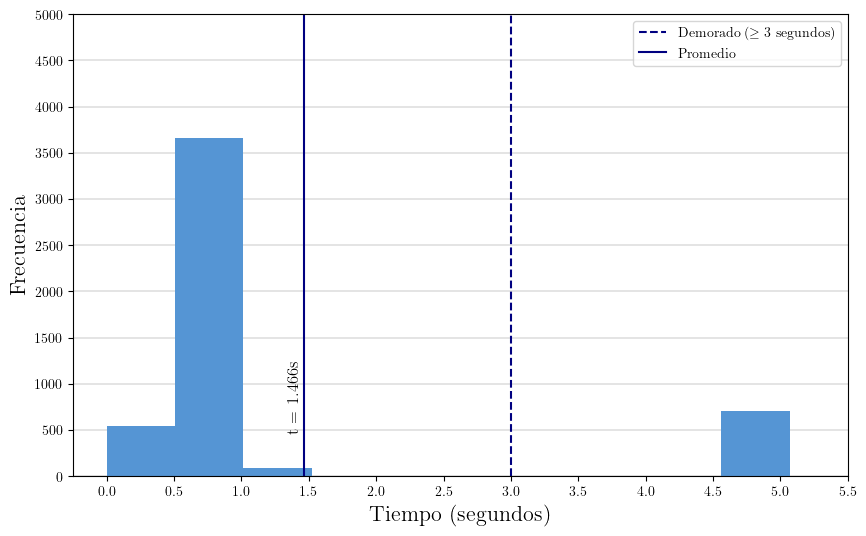

In [50]:
plt.figure(figsize=(10, 6))

plt.hist(df['total_time'], bins=10, color=colors[0], zorder=2)
plt.xticks(np.arange(0, 6, 0.5))
plt.xlabel('Tiempo (segundos)', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.yticks(np.arange(0, df.shape[0], 500))
#plt.title(f'Distribución del tiempo de viaje de los paquetes (n = {cant_recibidos} recibidos)')
plt.grid(axis='y', linewidth=0.3, color='grey', zorder=0)


# Línea vertical en threshold de demora
plt.axvline(x=3, color='navy', linestyle='--', label=r'$\mathrm{Demorado}\ (\geq 3 \mathrm{\ segundos)}$')
promedio_tiempo = np.mean(df['total_time'])
plt.axvline(x=promedio_tiempo, color='navy', linestyle='-', label='Promedio')
    
plt.text(0.285, 0.25, f't = {round(np.mean(promedio_tiempo), 3)}s', ha='center', va='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', rotation=90)

plt.legend()

# Para guardar la imagen
plt.savefig('Gráficos/dist-tiempos-llegada.png', dpi=300, bbox_inches='tight')

plt.show()

In [51]:
demorados = df[df['demorado'] == 1]

demorados = demorados[(demorados['total_time'] >= 1) & (demorados['total_time'] < 5.05)]
demorados_time = demorados['total_time']

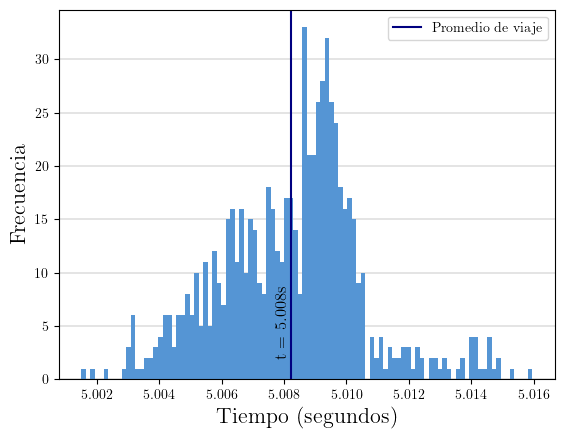

In [52]:
plt.hist(demorados_time, bins=100, color=colors[0], zorder=2)
#plt.xlim(5, 5.02)
plt.xlabel('Tiempo (segundos)', fontsize=16)
plt.axvline(x=np.mean(demorados_time), color='navy', linestyle='-', label=r'$\mathrm{Promedio\ de\ viaje}$')
plt.text(0.45, 0.25, f't = {round(np.mean(demorados_time), 3)}s', ha='center', va='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', rotation=90)
plt.grid(axis='y', linewidth=0.3, color='grey', zorder=0)


plt.ylabel('Frecuencia', fontsize=16)
#plt.title(f'Tiempo de viaje de los paquetes demorados (n = {cant_demorados})')

# Para guardar la imagen
plt.savefig('Gráficos/dist-demorados.png', dpi=300, bbox_inches='tight', )

plt.legend()
plt.show()

In [53]:
no_demorados = df[(df['demorado'] == 0) & (df['perdido'] == 0)]
no_demorados_time = no_demorados['total_time']

# Saco outliers
no_demorados_time = no_demorados_time[(no_demorados_time >= 1) & (no_demorados_time < 1.04)]


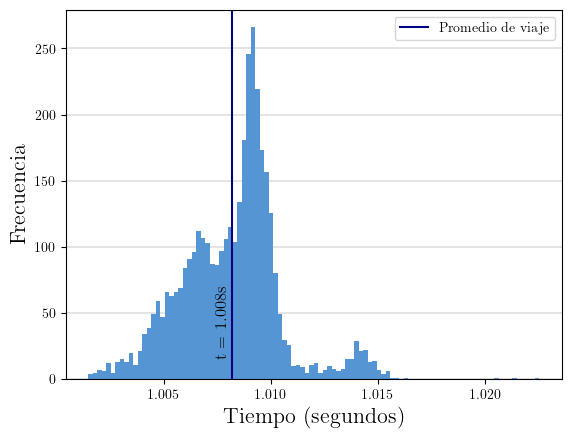

In [54]:
plt.hist(no_demorados_time, bins=100, color=colors[0], zorder=2)
plt.xlabel('Tiempo (segundos)', fontsize=16)
plt.axvline(x=np.mean(no_demorados_time), color='navy', linestyle='-', label=r'$\mathrm{Promedio\ de\ viaje}$')
plt.text(0.315, 0.25, f't = {round(np.mean(no_demorados_time), 3)}s', ha='center', va='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', rotation=90)
plt.grid(axis='y', linewidth=0.3, color='grey', zorder=0)


plt.ylabel('Frecuencia', fontsize=16)
#plt.title(f'Tiempo de viaje de los paquetes no demorados (n = {cant_recibidos - cant_demorados})')

# Para guardar la imagen
plt.savefig('Gráficos/dist-no-demorados.png', dpi=300, bbox_inches='tight')

plt.legend()
plt.show()